In [133]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as ppt
from scipy import signal
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter

In [134]:
data = pd.read_csv("zama.csv")
years = data.iloc[:,0].values
births = data.iloc[:,1].values
inv_im = data.iloc[:,2].values
pol_uni = data.iloc[:,3].values
wages = data.iloc[:,4].values

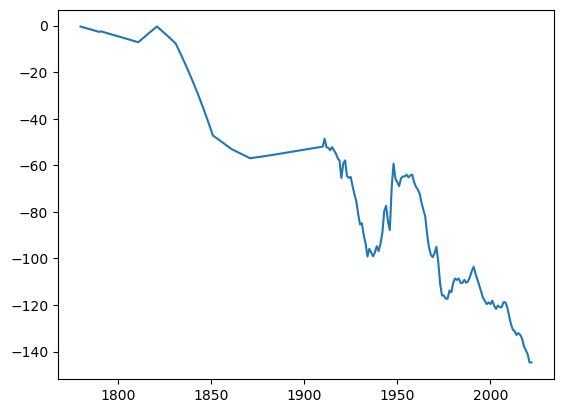

In [135]:
ppt.plot(years,births)

C:\Users\akhil\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\akhil\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\akhil\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\akhil\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


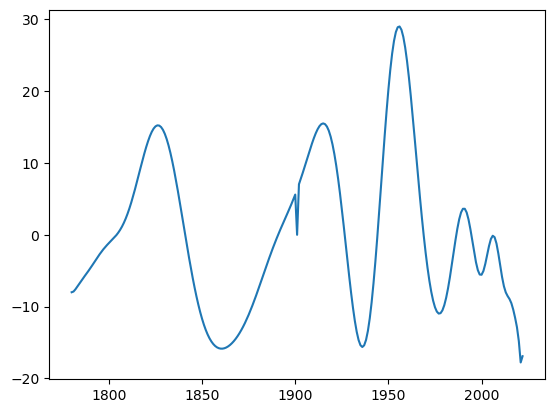

In [136]:
births_det = signal.detrend(births)
births = savgol_filter(births_det,242,121)
ppt.plot(years,births)

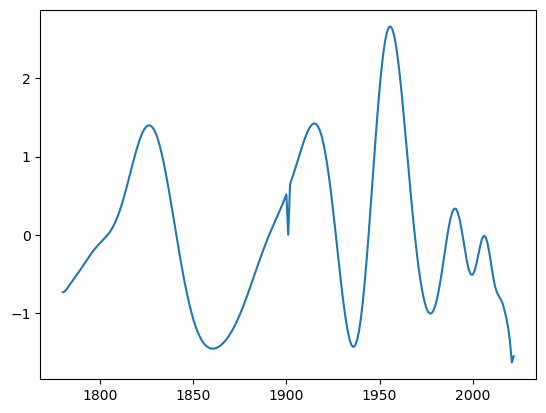

In [137]:
scaler = StandardScaler()
births = np.stack((years,births),axis=1)
births = scaler.fit_transform(births)
births = births[:,1]
ppt.plot(years,births)

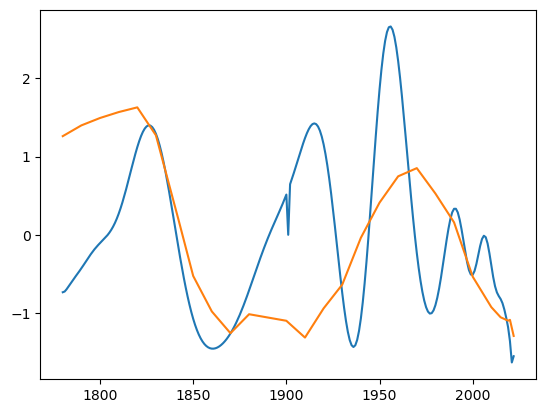

In [138]:
set = np.stack((years,inv_im),axis=1)
set = scaler.fit_transform(set)
inv_im = set[:,1]
metrics = np.stack((births,inv_im),axis=1)
ppt.plot(years,metrics)

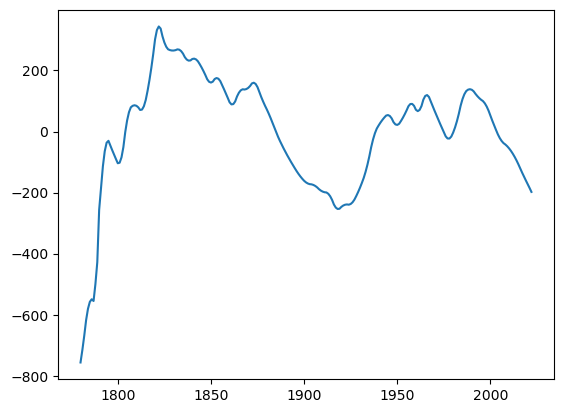

In [139]:
det = signal.detrend(pol_uni)
ppt.plot(years,det)

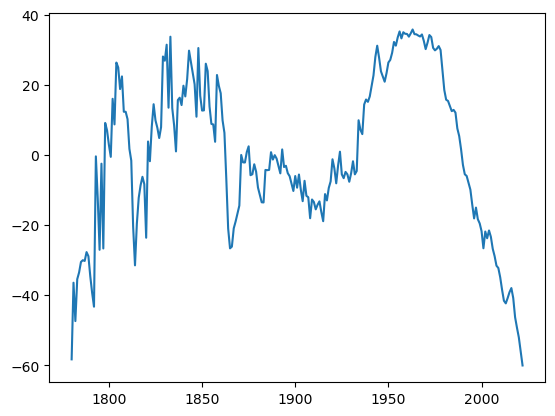

In [140]:
det = signal.detrend(wages)
ppt.plot(years,det)

C:\Users\akhil\anaconda3\lib\site-packages\numpy\lib\polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\akhil\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\akhil\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:223: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, 0, window_length, 0, halflen, axis,
C:\Users\akhil\anaconda3\lib\site-packages\scipy\signal\_savitzky_golay.py:226: RankWarning: Polyfit may be poorly conditioned
  _fit_edge(x, n - window_length, n, n - halflen, n, axis,


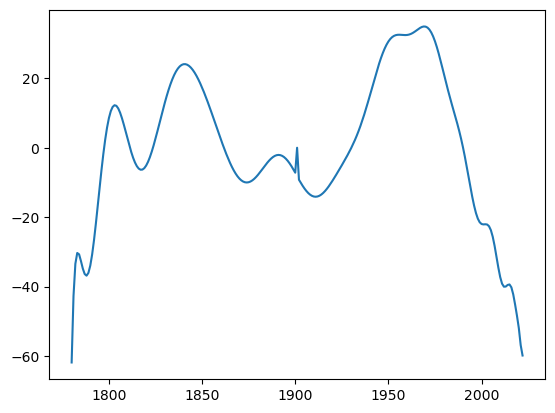

In [141]:
wages = savgol_filter(det,242,121)
ppt.plot(years,wages)

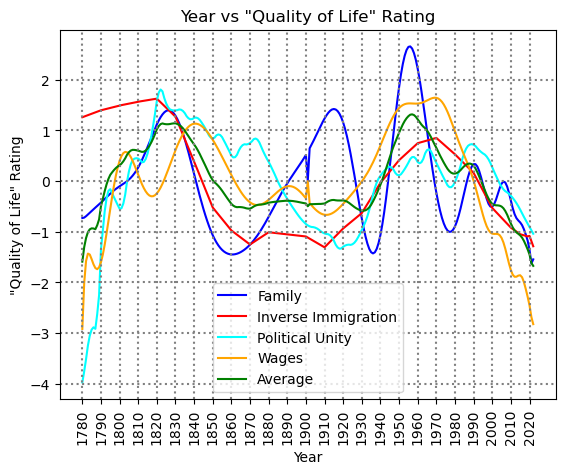

In [142]:
det = signal.detrend(pol_uni)
set = np.stack((years,det,wages),axis=1)
set = scaler.fit_transform(set)
pol_uni = set[:,1]
wages = set[:,2]
average = (pol_uni+births+inv_im+wages)/4
ppt.plot(years,births,color='blue')
ppt.plot(years,inv_im,color='red')
ppt.plot(years,pol_uni,color='cyan')
ppt.plot(years,wages,color='orange')
ppt.plot(years,average,color='green')
ppt.legend(['Family','Inverse Immigration','Political Unity','Wages','Average'])
for i in range(-4,3):
    ppt.axhline(y=i,color='gray',linestyle='dotted')
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")
ppt.title("Year vs \"Quality of Life\" Rating")
ppt.ylabel("\"Quality of Life\" Rating")
ppt.xlabel("Year")
ppt.savefig('ground.png')

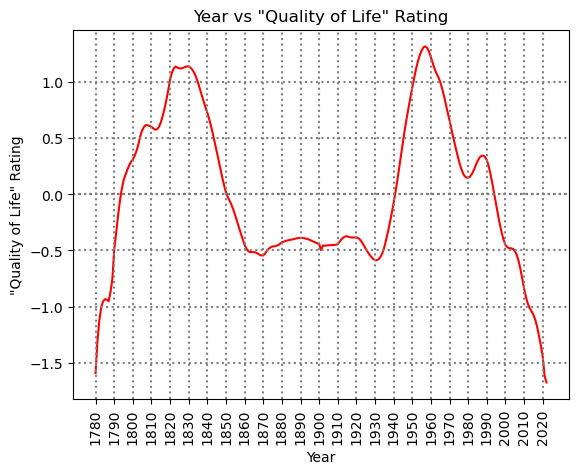

In [143]:
ppt.plot(years,average,color='red')
ppt.axhline(y=0,color='black',linestyle='dotted')
for i in range(-15,15,5):
    ppt.axhline(y=(i/10),color='gray',linestyle='dotted')
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")
ppt.title("Year vs \"Quality of Life\" Rating")
ppt.ylabel("\"Quality of Life\" Rating")
ppt.xlabel("Year")
ppt.savefig("sky.png")

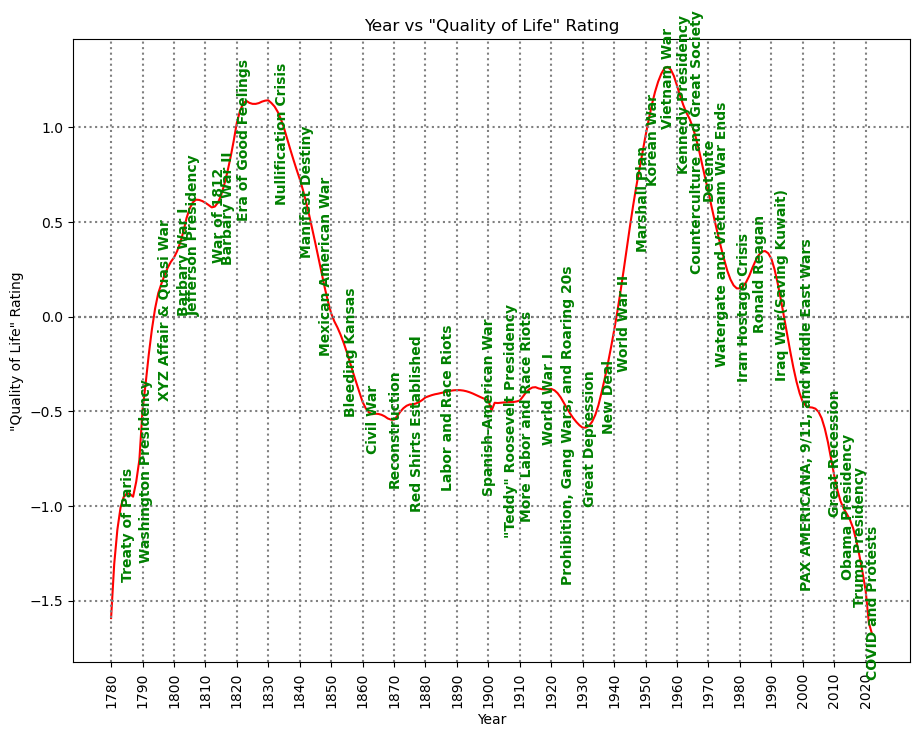

In [263]:
def write(year,text):
    ppt.text(year,average[year-1780]-(len(text)/40),text,c='green',rotation='vertical',weight='bold')
ppt.figure(figsize=(10.8,8.1))
ppt.plot(years,average,color='red')
ppt.axhline(y=0,color='black',linestyle='dotted')
for i in range(-15,15,5):
    ppt.axhline(y=(i/10),color='gray',linestyle='dotted')
for j in range(1780,2021,10):
    ppt.axvline(x=j,color='grey',linestyle='dotted')
ppt.xticks(np.arange(1780,2021,10),rotation="vertical")
ppt.title("Year vs \"Quality of Life\" Rating")
ppt.ylabel("\"Quality of Life\" Rating")
ppt.xlabel("Year")
write(1783,'Treaty of Paris')
write(1789,'Washington Presidency')
write(1795,'XYZ Affair & Quasi War')
write(1801,'Barbary War I')
write(1804,'Jefferson Presidency')
write(1812,'War of 1812')
write(1815,'Barbary War II')
write(1820,'Era of Good Feelings')
write(1832,'Nullification Crisis')
write(1840,'Manifest Destiny')
write(1846,'Mexican American War')
write(1854,'Bleeding Kansas')
write(1861,'Civil War')
write(1868,'Reconstruction')
write(1875,'Red Shirts Established')
write(1885,'Labor and Race Riots')
write(1898,'Spanish-American War')
write(1905,'\"Teddy\" Roosevelt Presidency')
write(1910,'More Labor and Race Riots')
write(1917,'World War I')
write(1923,'Prohibition, Gang Wars, and Roaring 20s')
write(1930,'Great Depression')
write(1936,'New Deal')
write(1941,'World War II')
write(1947,'Marshall Plan')
write(1950,'Korean War')
write(1955,'Vietnam War')
write(1960,'Kennedy Presidency')
write(1964,'Counterculture and Great Society')
write(1968,'Detente')
write(1972,'Watergate and Vietnam War Ends')
write(1979,'Iran Hostage Crisis')
write(1984,'Ronald Reagan')
write(1991,'Iraq War(Saving Kuwait)')
write(1999,'PAX AMERICANA, 9/11, and Middle East Wars')
write(2008,'Great Recession')
write(2012,'Obama Presidency')
write(2016,'Trump Presidency')
write(2020,'COVID and Protests')
ppt.savefig('true.png')